In [1]:
import pandas as pd
import numpy as np

C:\Users\91805\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_1= pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/Combine Normalization using Min Max scaler/GSE6613_final.csv')
df_2= pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/Combine Normalization using Min Max scaler/GSE57475_final.csv')
df_3= pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/Combine Normalization using Min Max scaler/GSE72267_final.csv')
df_4= pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/Combine Normalization using Min Max scaler/GSE99039_final.csv')
df_5 = pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/Combine Normalization using Min Max scaler/GSE18838_final.csv')#, delimiter=',',encoding='latin-1')

#df_train = pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/RMA normalization/Treated Data/PD_Expression_Metadata.csv')#, delimiter=',',encoding='latin-1')


C:\Users\91805\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\91805\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,1

In [5]:
#df_4= pd.read_csv('C:/Users/91805/Desktop/Review Paper Folder/Microarray gene expression data analysis from review papers/Combine Normalization using Min Max scaler/GSE99039_final - Copy.csv')


In [6]:
df_5.head() #

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
0,Status,CASE,CASE,CASE,CASE,CASE,CASE,CASE,CASE,CASE,...,CONTROL,CONTROL,CONTROL,CONTROL,CONTROL,CONTROL,CONTROL,CONTROL,CONTROL,CONTROL
1,A1BG,5.9743218,5.5291976,5.9058922,5.8690287,5.4508181,5.718872,5.9720539,5.5744974,5.2486091,...,5.7622619,6.146706,5.6743127,5.8490433,5.3264724,5.7138485,5.5851786,5.5727739,6.0041331,5.9335017
2,A1CF,2.497524,2.4044966,2.3999272,2.3030064,2.1725933,2.6695732,2.3569345,2.4881776,2.1086695,...,2.7930968,2.678645,2.4376893,2.5196101,2.4351019,2.3625328,2.3585325,2.2079373,2.4159485,2.3303761
3,A2M,4.5168031,3.7088853,3.9008459,3.8463066,3.5726637,3.956715,4.6629658,3.5607706,3.5868143,...,4.1250828,4.5505671,3.7392244,4.1132606,3.4959601,3.6819204,3.7022567,3.7030591,3.8691652,3.7400133
4,A2ML1,1.8894517,1.8944146,1.8899495,1.6426936,1.7126001,1.8599035,1.7601811,1.9738122,1.5445814,...,1.8932316,2.0378973,1.7593644,1.7979235,1.6841783,1.601264,1.7153526,1.933714,1.8742281,1.5823373


In [7]:
df1=df_1.transpose()
df2=df_2.transpose()
df3=df_3.transpose()
df4=df_4.transpose()
df5=df_5.transpose()


In [8]:
df1.head() #1, 2, 3

,0,1,2,3,4,5,6,7,8,9,...,13030,13031,13032,13033,13034,13035,13036,13037,13038,13039
Unnamed: 0,Status,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,...,KCNE4,GALR3,ARHGAP8,ZNF710-AS1,SAP25,RBM12B,FAM239A,TMEM231,SNHG17,LOC100505915
0,CASE,5.94527,4.107258,7.378215,4.982214,4.511637,6.622206,4.789251,4.227802,7.879369,...,3.423818,7.869167,3.641825,4.887677,7.099516,3.102517,4.251723,2.900465,5.274921,4.708433
1,CONTROL,6.005223,4.120264,7.067046,5.013441,4.527885,6.75242,4.79675,4.277558,7.458354,...,3.593182,7.785993,3.613923,4.839791,7.244315,3.030257,4.232743,2.99057,5.357321,4.696988
2,CONTROL,5.88849,4.254527,7.210372,4.85655,4.655511,6.996885,4.609873,4.157567,8.489934,...,3.417558,7.896946,3.603938,4.937392,7.241816,2.996966,4.372401,2.972374,5.427785,4.599312
3,CASE,6.08795,4.043322,7.530565,5.013009,4.54815,6.805449,4.847826,4.103033,8.169524,...,3.463284,7.621795,3.52842,4.686294,7.158257,2.955618,4.252552,2.936442,5.465683,4.613214


In [9]:
# Using DataFrame.rename()
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
df4.reset_index(inplace=True)
df5.reset_index(inplace=True)

#df4.head()


In [10]:
df1.head()

,index,0,1,2,3,4,5,6,7,8,...,13030,13031,13032,13033,13034,13035,13036,13037,13038,13039
0,Unnamed: 0,Status,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,...,KCNE4,GALR3,ARHGAP8,ZNF710-AS1,SAP25,RBM12B,FAM239A,TMEM231,SNHG17,LOC100505915
1,0,CASE,5.94527,4.107258,7.378215,4.982214,4.511637,6.622206,4.789251,4.227802,...,3.423818,7.869167,3.641825,4.887677,7.099516,3.102517,4.251723,2.900465,5.274921,4.708433
2,1,CONTROL,6.005223,4.120264,7.067046,5.013441,4.527885,6.75242,4.79675,4.277558,...,3.593182,7.785993,3.613923,4.839791,7.244315,3.030257,4.232743,2.99057,5.357321,4.696988
3,2,CONTROL,5.88849,4.254527,7.210372,4.85655,4.655511,6.996885,4.609873,4.157567,...,3.417558,7.896946,3.603938,4.937392,7.241816,2.996966,4.372401,2.972374,5.427785,4.599312
4,3,CASE,6.08795,4.043322,7.530565,5.013009,4.54815,6.805449,4.847826,4.103033,...,3.463284,7.621795,3.52842,4.686294,7.158257,2.955618,4.252552,2.936442,5.465683,4.613214


In [11]:
df2.head()

,index,0,1,2,3,4,5,6,7,8,...,14433,14434,14435,14436,14437,14438,14439,14440,14441,14442
0,Unnamed: 0,Status,7A5,A1CF,POTEB,A26C3,A2BP1,A2M,A2ML1,A3GALT2,...,ZPLD1,ZRANB3,ZSCAN1,ZSCAN10,ZSCAN2,ZSWIM3,ZWILCH,ZWINT,ZXDA,ZYG11A
1,0,CASE,75,79,88,72,72,84,75,75,...,89,68,79,76,80,73,55,75,75,72
2,1,CASE,77,82,80,74,70,77,62,85,...,58,72,71,82,84,75,59,78,73,83
3,2,CASE,76,87,75,80,68,70,72,76,...,74,68,64,70,81,78,59,82,71,70
4,3,CASE,69,93,84,73,74,86,82,74,...,77,79,68,76,90,71,61,86,66,82


In [12]:
df1 = df1.drop('index', axis=1)
df2 = df2.drop('index', axis=1)
df3 = df3.drop('index', axis=1)
df4 = df4.drop('index', axis=1)
df5 = df5.drop('index', axis=1)

In [13]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,13030,13031,13032,13033,13034,13035,13036,13037,13038,13039
0,Status,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,...,KCNE4,GALR3,ARHGAP8,ZNF710-AS1,SAP25,RBM12B,FAM239A,TMEM231,SNHG17,LOC100505915
1,CASE,5.94527,4.107258,7.378215,4.982214,4.511637,6.622206,4.789251,4.227802,7.879369,...,3.423818,7.869167,3.641825,4.887677,7.099516,3.102517,4.251723,2.900465,5.274921,4.708433
2,CONTROL,6.005223,4.120264,7.067046,5.013441,4.527885,6.75242,4.79675,4.277558,7.458354,...,3.593182,7.785993,3.613923,4.839791,7.244315,3.030257,4.232743,2.99057,5.357321,4.696988
3,CONTROL,5.88849,4.254527,7.210372,4.85655,4.655511,6.996885,4.609873,4.157567,8.489934,...,3.417558,7.896946,3.603938,4.937392,7.241816,2.996966,4.372401,2.972374,5.427785,4.599312
4,CASE,6.08795,4.043322,7.530565,5.013009,4.54815,6.805449,4.847826,4.103033,8.169524,...,3.463284,7.621795,3.52842,4.686294,7.158257,2.955618,4.252552,2.936442,5.465683,4.613214


In [14]:
df1 = df1.rename(columns=df1.iloc[0]).loc[1:]
df2 = df2.rename(columns=df2.iloc[0]).loc[1:]
df3 = df3.rename(columns=df3.iloc[0]).loc[1:]
df4 = df4.rename(columns=df4.iloc[0]).loc[1:]
df5 = df5.rename(columns=df5.iloc[0]).loc[1:]

In [15]:
df1.head()

,Status,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,...,KCNE4,GALR3,ARHGAP8,ZNF710-AS1,SAP25,RBM12B,FAM239A,TMEM231,SNHG17,LOC100505915
1,CASE,5.94527,4.107258,7.378215,4.982214,4.511637,6.622206,4.789251,4.227802,7.879369,...,3.423818,7.869167,3.641825,4.887677,7.099516,3.102517,4.251723,2.900465,5.274921,4.708433
2,CONTROL,6.005223,4.120264,7.067046,5.013441,4.527885,6.75242,4.79675,4.277558,7.458354,...,3.593182,7.785993,3.613923,4.839791,7.244315,3.030257,4.232743,2.99057,5.357321,4.696988
3,CONTROL,5.88849,4.254527,7.210372,4.85655,4.655511,6.996885,4.609873,4.157567,8.489934,...,3.417558,7.896946,3.603938,4.937392,7.241816,2.996966,4.372401,2.972374,5.427785,4.599312
4,CASE,6.08795,4.043322,7.530565,5.013009,4.54815,6.805449,4.847826,4.103033,8.169524,...,3.463284,7.621795,3.52842,4.686294,7.158257,2.955618,4.252552,2.936442,5.465683,4.613214
5,CASE,5.882756,4.214321,7.3191,4.943627,4.561594,7.016592,4.74938,4.262953,8.833972,...,3.5933,8.001645,3.688825,5.014518,7.145088,2.988089,4.195905,2.988502,5.48524,4.601026


In [16]:
#####################################################################################################

In [17]:
l1=list(df1.columns)
l2=list(df2.columns)
l3=list(df3.columns)
l4=list(df4.columns)
l5=list(df5.columns)

In [18]:
common_genes = list(set(l1) & set(l2) & set(l3) & set(l4) & set(l5))# & set(df3_columns)) 

In [19]:
len(common_genes)

3550

In [20]:
################################################# Now we have common genes among all datasets ###################################
## Now 

In [21]:
df1_final=df1[common_genes]
df2_final=df2[common_genes]
df3_final=df3[common_genes]
df4_final=df4[common_genes]
df5_final=df5[common_genes]

In [22]:
frames = [df1_final, df2_final, df3_final, df4_final, df5_final]

In [23]:
df_train_final = pd.concat(frames)

In [24]:
df_train_final.reset_index(inplace = True)

In [25]:
df_train_final.drop(['index'], axis = 1, inplace= True)

In [26]:
df_train_final.head()

,MKRN3,CHRM5,C1R,DUSP4,CFI,FCGR2A,PPM1A,EPB41L5,ANP32A,NBR2,...,MS4A4A,RASL10A,RLN2,HPS4,PTCH2,KDM5A,CTNND2,SULT1A1,ITSN1,WDR44
0,4.391782,4.838652,4.008629,3.540113,4.211891,9.614469,5.749847,4.698341,5.585012,5.075776,...,3.360965,5.611193,3.606053,4.161591,5.12607,5.191421,3.937539,7.544411,4.169874,3.970406
1,4.548753,5.118907,4.234805,3.709409,4.159584,9.571191,5.994123,4.842899,5.421206,5.07218,...,3.327278,5.512474,3.503312,4.225788,5.257277,4.709304,4.020684,7.359304,4.242813,3.974124
2,4.419098,4.84533,4.01105,3.63179,4.204589,9.444122,5.5214,4.461645,5.452647,4.992725,...,3.84768,5.533686,3.728544,4.20358,4.884547,4.994779,3.988353,7.531191,4.146042,4.035768
3,4.469762,5.387847,4.293267,3.694364,4.352989,9.86487,5.923547,4.751096,5.519088,5.119841,...,3.463599,5.355585,3.81619,4.291059,4.87955,4.85044,3.958003,8.265612,4.331255,3.883002
4,4.405389,4.616497,4.05573,3.744284,4.174711,9.360073,5.727065,4.672554,5.289773,5.002066,...,3.661647,5.442685,3.735267,4.100169,4.913808,5.227383,3.903648,6.857146,4.234974,4.089406


In [27]:
df_train_final.tail()

,MKRN3,CHRM5,C1R,DUSP4,CFI,FCGR2A,PPM1A,EPB41L5,ANP32A,NBR2,...,MS4A4A,RASL10A,RLN2,HPS4,PTCH2,KDM5A,CTNND2,SULT1A1,ITSN1,WDR44
734,4.0114009,3.3837181,4.2810291,4.0837565,1.8793062,11.2733877,7.0710762,3.5955456,5.8377037,5.8092691,...,2.7662562,5.2400734,1.4475797,5.7189363,5.2367489,7.159639,4.6556695,6.5160382,3.782032,4.3059691
735,4.0713752,3.5792852,4.460355,3.9553657,1.8709738,11.5174945,5.7434408,3.3802828,5.7285571,5.8641296,...,3.1824667,4.9347032,1.6825069,6.161586,5.0388411,7.1153947,4.4106117,6.3791643,3.8574447,4.0765746
736,3.7486093,3.2325648,4.3788506,4.0053753,1.8703268,11.259121,6.4093626,3.3074698,5.9111493,5.8199482,...,2.7155301,5.1071079,1.7037807,5.8670819,5.0642631,7.0787736,4.6659134,6.5522051,3.8335681,4.1471717
737,4.3375964,4.1864251,4.747078,4.565272,1.9248473,10.6900221,6.1842044,3.1808287,5.9733806,5.7249418,...,1.6217348,5.5896049,2.1493989,5.7842238,5.4455662,6.2137663,4.9597185,6.3050732,3.8836963,3.811075
738,4.0008355,3.4791578,4.3249083,4.1424868,1.7823972,10.7638021,6.9048003,3.2159411,6.0973432,6.4403202,...,3.8343598,5.0316302,1.9021007,5.9606964,5.0853484,6.8397261,4.6626512,6.2348086,3.7860212,4.298708


In [28]:
df_train_final.shape

(739, 3550)

In [29]:
df1_final.shape

(72, 3550)

In [30]:
df2_final.shape

(142, 3550)

In [31]:
df3_final.shape 

(59, 3550)

In [32]:
df4_final.shape

(438, 3550)

In [33]:
df4_final['Status'].value_counts()

CONTROL    233
CASE       205
Name: Status, dtype: int64

In [34]:
df_train_final['Status'].value_counts()

CASE       405
CONTROL    334
Name: Status, dtype: int64

In [35]:
y, X = df_train_final["Status"], df_train_final.drop(columns=["Status"])

In [36]:
###################### Train test split ##########################################

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=20 )

plt.figure(figsize=(4,8))
colors = ["CASE", "CONTROL"]
sns.countplot('Status', data=df_train_final, palette = "Set1")
plt.title('Class Distributions \n (0: Parkinsons disease || 1: Healthy Control)', fontsize=14)

In [38]:
type(y_train) # type(X_train)

pandas.core.series.Series

In [39]:
X_train.head()

,MKRN3,CHRM5,C1R,DUSP4,CFI,FCGR2A,PPM1A,EPB41L5,ANP32A,NBR2,...,MS4A4A,RASL10A,RLN2,HPS4,PTCH2,KDM5A,CTNND2,SULT1A1,ITSN1,WDR44
389,3.680225,3.192034,4.107617,3.582575,2.626203,6.072735,5.401731,3.322759,6.463247,5.280639,...,4.643715,4.045761,2.686991,4.869507,4.390428,6.187653,2.976111,8.139762,3.55665,4.690324
714,4.0195171,3.5235061,4.4278721,4.0711717,2.0843529,10.7359705,6.686752,3.0592124,6.4252981,5.4545774,...,1.7424581,5.4056252,1.99438,5.5276081,5.1253396,6.8636651,4.5731464,6.0370039,3.8627613,4.044917
400,3.266135,3.194133,4.026582,3.276207,2.563427,6.31721,5.13472,3.236108,7.178431,5.046709,...,4.490003,4.058885,3.091706,4.806561,3.830571,6.122923,2.738961,7.995889,3.383312,4.794741
385,3.368671,3.282791,4.523077,3.524022,2.235235,6.217595,5.41498,2.873594,6.90099,5.616139,...,4.58186,3.733162,2.788102,5.016891,3.903273,6.467296,2.819256,8.359665,3.497239,4.756806
107,81,69,74,74,65,62,92,65,74,68,...,65,72,63,56,63,41,67,63,81,72


In [40]:
############################# Data Normalization ##############################

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
Std_scaler = RobustScaler()
Std_scaler.fit(X_train.values)
scaled_features=Std_scaler.transform(X_train.values)
X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
scaled_features_test=Std_scaler.transform(X_test.values)
X_test = pd.DataFrame(scaled_features_test, index=X_test.index, columns=X_test.columns)

In [148]:
################ Feature Selection #########################

In [42]:
lasso_list=["MGLL",
"KCND2",
"IL1A",
"CYP7B1",
"IL17RC",
"EDN2",
"IL11",
"PSMF1",
"CCL17",
"GPR45",
"LPA",
"TAF7L",
"SPARCL1",
"REEP2",
"GNLY",
"IFNB1",
"CEACAM6",
"CACNG2",
"PI15",
"MAD1L1",
"MLLT1",
"OR52A1",
"MAPK8IP1",
"MMP20",
"E2F8",
"GPR19",
"ISLR",
"SEMG2",
"LMAN1",
"HOXB9",
"ASPA",
"ANAPC2",
"TNNC2",
"ATP4A",
"SYN1",
"MC3R",
"NIN",
"RAPGEF4",
"UGT2B4",
"TEX14",
"CHAC1",
"CYP2W1",
"FOXF1",
"GREM1",
"MECR",
"OR12D2",
"MAGEA11",
"MED31",
"B3GNT4",
"NR4A1",
"TRAIP",
"HPGDS",
"LTBP3",
"KLHDC8A",
"KLK6",
"FAT4",
"PAPPA2",
"HSPB8",
"FUT3",
"RNF208",
"SCGB2A2",
"GRIK4",
"GHR",
"SPR",
"PTPRH",
"SNCB",
"KRT5",
"MBL2",
"PRUNE2",
"PROX1",
"SNAI2",
"CA14",
"COLEC11",
"VCAM1",
"ANKRD2",
"AURKC",
"CPZ",
"BAMBI",
"GYG2",
"AREG",
"ANGPT4",
"C4BPB",
"EPN3",
"SLC3A2",
"PKDREJ",
"TBX4",
"CD34",
"ACOXL",
"VGLL3",
"PLD3",
"SLC5A5",
"KIT",
"UTY",
"MT1M",
"BRCA2",
"NPPC",
"BCL2L11",
"TNNT1",
"GSTA4",
"CDH20",
"WSCD1",
"MAGEB1",
"SST",
"EYA1",
"MTMR8",
"ETV1",
"PROP1",
"GPRC5C",
"ABCB9",
"ABI3BP",
"TCAP",
"PPFIA3",
"NDRG2",
"EIF1AY",
"PADI3",
"MUC7",
"JUP",
"SLC27A6",
"MTTP",
"STAP2",
"GCGR",
"DAZL",
"NACA2",
"FRK",
"LRP2",
"C7",
"RBP4",
"GDF2",
"CLUL1",
"MTUS2",
"TNP2",
"DLK2",
"NR4A3",
"TSPAN8",
"CYP4F11",
"DIAPH3",
"PMAIP1",
"CORIN",
"RASL12",
"FGF6",
"TAF13",
"FBXO17",
"PRDM1",
"CACNA1S",
"CNN1",
"RIC3",
"TNFSF18",
"IQCC",
"POU3F2",
"FSTL4",
"IGFBP2",
"PNLIP",
"CCL24",
"STEAP1",
"PTPRT",
"PNLIPRP2",
"ADORA1",
"MYH2",
"DUSP13",
"RHOH",
"TRIM15",
"ABHD2",
"HSD17B1",
"LAMB3",
"GEM",
"ANXA3",
"BMX",
"DLGAP5",
"OGN",
"ZNF214",
"PRKG1",
"ZP2",
"ADPRH",
"LUZP4",
"NEK11",
"GLDC",
"APOD",
"GJB3",
"MAP3K10",
"ADRA2C",
"WNT8B",
"LINS1",
"SORCS3",
"CYP2A13",
"NPTX2",
"SLC30A4",
"TTYH1",
"SYT1",
"EYA3",
"SFRP5",
"KLK2",
"MTNR1B",
"CFHR4",
"ZNF157",
"KLK3",
"IL3",
"FGF14",
"F7",
"CAP2",
"PPY",
"TRPV5",
"DRD2",
"SULT1C2",
"RHOD",
"VAV3",
"CTNNAL1",
"RHBG",
"TCF7",
"AR",
"PKD2L1",
"NR6A1",
"RNF17",
"BUB1",
"KAZALD1",
"HAP1",
"APLP1",
"SCN1B",
"CYFIP1",
"PAK6",
"PALM",
"MYT1L",
"AGRP",
"CYP3A4",
"GRIN2B",
"ERN1",
"SPRR1A",
"PRKY",
"MYF6",
"CRYGD",
"QSER1",
"P2RY4",
"ADAMTS2",
"PAQR6",
"CHRNA3",
"MMP28",
"CCT8L2",
"RAX",
"COL9A3",
"MATN3",
"SERPINF1",
"VAV2",
"MKRN3",
"PRDX2",
"PEG10",
"OR1E2",
"TMSB4Y",
"MGAT4C",
"EPYC",
"RNASE1",
"SYNGR1",
"CST1",
"PTER",
"CACNA1G",
"HAS2",
"GPR85",
"ITIH5",
"ACTC1",
"PRM2",
"MYEF2",
"MSLN",
"TNFRSF10D",
"TEAD4",
"TAS2R9",
"OLFM1",
"FLT1",
"THBD",
"ZNF136",
"PFKL",
"MSR1",
"FSHB",
"CER1",
"FMO1",
"PCSK1",
"SOCS3",
"FBXO22",
"ADAMTS3",
"GABRA3",
"CCDC68",
"CDC42EP1",
"LGI2",
"FBXO40",
"CSRP3",
"TIMP4",
"FCRL2",
"THAP10",
"OPLAH",
"CYSLTR2",
"BDNF",
"PROZ",
"DIXDC1",
"TMPRSS5",
"KRT12",
"TLX2",
"AP3B2",
"CPN2",
"MRAS",
"TTLL1",
"SUMO4",
"ZNF384",
"UGT2A3",
"METTL1",
"GDF9",
"GJB5",
"SCN3B",
"CILP",
"SGCG",
"GABRE",
"HSD3B1",
"CST5",
"UBE2C",
"CRYBB3",
"LHX3",
"ADAMDEC1",
"C4BPA",
"RPE65",
"SERPINA6",
"PCSK2",
"IL12B",
"SMR3B",
"NPY5R",
"INHBE",
"TUBG1",
"ROS1",
"B3GALT5",
"TACR2",
"FEZF2",
"OR10H1",
"CYP26A1",
"SERPINA4",
"SCN5A",
"P2RX2",
"CPB2",
"CYP2J2",
"DEFA6",
"ARHGEF10L",
"MAT1A",
"GTF2IRD1",
"EPS8L3",
"GARNL3",
"DAB1",
"PRRG4",
"CNTFR",
"DMP1",
"GFRA1",
"KCNMB4",
"LAMA1",
"CHIA",
"RPL41",
"ZNF460",
"DZIP1",
"GSC2",
"CSN3",
"DCBLD2",
"PRRG2",
"CALB2",
"HABP2",
"HIGD1B",
"CHRDL1",
"CHST8",
"ZNF667",
"MYLK3",
"MIP",
"CSF2",
"CLPS",
"CACNG3",
"MSTN",
"SNAI1",
"SNX16",
"OR3A1",
"KCNH2",
"LSR",
"ALDH3A1",
"RIT2",
"COL7A1",
"KRT33B",
"HOXA4",
"CCDC102B",
"RPSA",
"FDXR",
"OR2W1",
"MYH13",
"AKAP4",
"FOXD1",
"CD5L",
"EGFL7",
"NCR1",
"MXI1",
"COL21A1",
"PLA2G2A",
"KLRG1",
"OTC",
"TET3",
"PALMD",
"COL17A1",
"DPY19L2P2",
"TRPM4",
"CCR9",
"SEMA4C",
"AICDA",
"LRRC19",
"MCTP1",
"GPR157",
"KCNQ1DN",
"PARP3",
"CTNNBIP1",
"ARVCF",
"CRYAB",
"TSSK2",
"FAM135A",
"CYP27B1",
"FRMD1",
"TRMT2B",
"MED18",
"APOBEC1",
"FSHR",
"DHRS2",
"SLC38A4",
"LHX5",
"MAML3",
"CYP39A1",
"PCDHB11",
"CDH12",
"ZNF334",
"SLITRK5",
"VTCN1",
"PLA2G2F",
"ADAMTS12",
"B3GNT3",
"PCDH1",
"DIRAS2",
"FOLR1",
"MATN2",
"MET",
"S100A14",
"TDGF1",
"POU5F1",
"UGT1A10",
"CDX4"]

In [43]:
## create dataset with selected features

X_train_lasso =pd.DataFrame(X_train, columns=lasso_list)

In [44]:

X_test_lasso =pd.DataFrame(X_test, columns=lasso_list)

In [45]:
X_test_lasso.head()

,MGLL,KCND2,IL1A,CYP7B1,IL17RC,EDN2,IL11,PSMF1,CCL17,GPR45,...,PCDH1,DIRAS2,FOLR1,MATN2,MET,S100A14,TDGF1,POU5F1,UGT1A10,CDX4
426,-0.474589,-0.028062,-0.208996,0.083464,-0.483106,-0.457984,0.037040,-0.137393,0.001010,-0.321376,...,0.260271,-0.115505,0.073543,-0.192454,-0.249147,0.021662,-0.337732,-0.518718,-0.170975,-0.122168
309,-0.023671,-0.217808,-0.424847,0.242382,-0.353725,-0.423604,0.110775,-0.099701,-0.167436,-0.254034,...,-0.661113,-0.159177,-0.521605,-0.123503,-0.136908,0.145836,1.097447,-0.415836,-0.242366,-0.368860
104,54.663954,123.741272,46.357264,78.381409,44.738679,54.183583,65.517466,12.647467,77.715872,113.710869,...,86.649611,67.340040,50.010349,28.620957,56.359845,46.678181,89.786387,83.852503,69.682768,49.252021
478,0.399659,-0.214694,0.046398,-0.331743,-0.370337,-0.445589,-0.124315,0.154885,-0.515684,-0.970354,...,0.162320,-0.318140,0.130523,-0.152185,-0.288616,-0.142039,-0.484632,-0.200549,-0.365082,-0.336719
333,-0.121815,-0.072368,-0.628504,-0.039777,-0.352871,-0.359385,-0.324596,-0.107423,-0.440371,-1.160549,...,-0.995110,-0.182425,-1.147506,-0.077783,-0.277209,-0.403644,-0.164582,0.008294,-0.398667,-0.474521


In [46]:
y_test.head()

426    CONTROL
309    CONTROL
104       CASE
478       CASE
333       CASE
Name: Status, dtype: object

In [47]:
############# Target Scaling #################

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
Std_scaler = RobustScaler()
Std_scaler.fit(X_train_lasso.values)
scaled_features=Std_scaler.transform(X_train_lasso.values)
X_train_lasso = pd.DataFrame(scaled_features, index=X_train_lasso.index, columns=X_train_lasso.columns)
scaled_features_test=Std_scaler.transform(X_test_lasso.values)
X_test_lasso = pd.DataFrame(scaled_features_test, index=X_test_lasso.index, columns=X_test_lasso.columns)

Std_scaler = RobustScaler()
Std_scaler.fit(X_train_lasso.values)


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [49]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,

In [50]:
####################----Feature Selection----#############################

In [51]:
################ k-fold cross validation  ###############################

In [52]:
import matplotlib.patches as patches

In [53]:
from sklearn import svm 
from statistics import mean, stdev
from numpy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix, roc_auc_score

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
##########################################################################################################################

In [58]:
#x_train, x_test, y_train, y_test = train_test_split(X_train_lasso,y_train,test_size=0.10, stratify=Y1)

In [59]:
y_train=pd.DataFrame(y_train)

In [60]:
type(y_train)

pandas.core.frame.DataFrame

In [61]:
le.classes_

array(['CASE', 'CONTROL'], dtype=object)

In [62]:
y_train = y_train.rename(columns={0: 'Status'})

In [63]:
y_train.head()

,Status
0,1
1,0
2,1
3,1
4,0


In [64]:
X_train_lasso.shape

(591, 438)

In [65]:
X_train_lasso.reset_index(inplace = True)


In [66]:
X_train_lasso.head()

,index,MGLL,KCND2,IL1A,CYP7B1,IL17RC,EDN2,IL11,PSMF1,CCL17,...,PCDH1,DIRAS2,FOLR1,MATN2,MET,S100A14,TDGF1,POU5F1,UGT1A10,CDX4
0,389,-0.272540,-0.457337,-0.059144,-0.244225,-0.304635,-0.064171,0.272329,0.088931,-0.014139,...,0.386989,-0.059338,0.003357,-0.068719,0.222242,0.137604,-0.025595,0.327999,-0.094145,0.274406
1,714,-0.681120,0.735114,-1.234090,0.967836,0.396255,0.612347,1.661953,0.413002,0.675605,...,0.684509,1.278098,-1.950655,0.191162,-0.736062,-0.338284,-3.412441,-4.249168,-0.280576,-1.276961
2,400,0.198877,-0.153403,-0.217172,-0.258209,-0.254326,-0.035220,-0.189788,-0.122188,-0.313374,...,-0.135839,0.022172,-0.100649,0.014945,0.019474,-0.056443,0.067657,-0.321092,-0.249842,-0.123694
3,385,-0.243997,-0.533471,-0.043108,-0.028161,-0.368499,-0.330792,-0.100708,-0.102154,-0.574276,...,-0.220012,-0.016361,0.201593,0.007508,-0.081825,-0.117157,0.009972,0.230390,-0.653463,-0.078728
4,107,47.795303,91.243452,39.447902,52.703995,45.498452,47.956001,69.446808,15.238582,69.543883,...,95.168134,53.813888,52.690575,45.730988,59.526200,53.726051,80.562635,77.381895,76.757555,37.497083


In [67]:
X_train_lasso.drop(['index'], axis = 1, inplace= True)

In [68]:
X_train_lasso.head()

,MGLL,KCND2,IL1A,CYP7B1,IL17RC,EDN2,IL11,PSMF1,CCL17,GPR45,...,PCDH1,DIRAS2,FOLR1,MATN2,MET,S100A14,TDGF1,POU5F1,UGT1A10,CDX4
0,-0.272540,-0.457337,-0.059144,-0.244225,-0.304635,-0.064171,0.272329,0.088931,-0.014139,0.103648,...,0.386989,-0.059338,0.003357,-0.068719,0.222242,0.137604,-0.025595,0.327999,-0.094145,0.274406
1,-0.681120,0.735114,-1.234090,0.967836,0.396255,0.612347,1.661953,0.413002,0.675605,-0.199616,...,0.684509,1.278098,-1.950655,0.191162,-0.736062,-0.338284,-3.412441,-4.249168,-0.280576,-1.276961
2,0.198877,-0.153403,-0.217172,-0.258209,-0.254326,-0.035220,-0.189788,-0.122188,-0.313374,-0.501974,...,-0.135839,0.022172,-0.100649,0.014945,0.019474,-0.056443,0.067657,-0.321092,-0.249842,-0.123694
3,-0.243997,-0.533471,-0.043108,-0.028161,-0.368499,-0.330792,-0.100708,-0.102154,-0.574276,-0.290868,...,-0.220012,-0.016361,0.201593,0.007508,-0.081825,-0.117157,0.009972,0.230390,-0.653463,-0.078728
4,47.795303,91.243452,39.447902,52.703995,45.498452,47.956001,69.446808,15.238582,69.543883,79.940423,...,95.168134,53.813888,52.690575,45.730988,59.526200,53.726051,80.562635,77.381895,76.757555,37.497083


In [69]:
strtied_dataset1 = [X_train_lasso, y_train]
final_df1 = pd.concat(strtied_dataset1, sort=False, axis=1)

In [70]:
final_df1.shape

(591, 439)

In [71]:
final_df1.head()

,MGLL,KCND2,IL1A,CYP7B1,IL17RC,EDN2,IL11,PSMF1,CCL17,GPR45,...,DIRAS2,FOLR1,MATN2,MET,S100A14,TDGF1,POU5F1,UGT1A10,CDX4,Status
0,-0.272540,-0.457337,-0.059144,-0.244225,-0.304635,-0.064171,0.272329,0.088931,-0.014139,0.103648,...,-0.059338,0.003357,-0.068719,0.222242,0.137604,-0.025595,0.327999,-0.094145,0.274406,1
1,-0.681120,0.735114,-1.234090,0.967836,0.396255,0.612347,1.661953,0.413002,0.675605,-0.199616,...,1.278098,-1.950655,0.191162,-0.736062,-0.338284,-3.412441,-4.249168,-0.280576,-1.276961,0
2,0.198877,-0.153403,-0.217172,-0.258209,-0.254326,-0.035220,-0.189788,-0.122188,-0.313374,-0.501974,...,0.022172,-0.100649,0.014945,0.019474,-0.056443,0.067657,-0.321092,-0.249842,-0.123694,1
3,-0.243997,-0.533471,-0.043108,-0.028161,-0.368499,-0.330792,-0.100708,-0.102154,-0.574276,-0.290868,...,-0.016361,0.201593,0.007508,-0.081825,-0.117157,0.009972,0.230390,-0.653463,-0.078728,1
4,47.795303,91.243452,39.447902,52.703995,45.498452,47.956001,69.446808,15.238582,69.543883,79.940423,...,53.813888,52.690575,45.730988,59.526200,53.726051,80.562635,77.381895,76.757555,37.497083,0


In [72]:
#type(strtied_dataset1)

In [73]:
final_df1.head()

,MGLL,KCND2,IL1A,CYP7B1,IL17RC,EDN2,IL11,PSMF1,CCL17,GPR45,...,DIRAS2,FOLR1,MATN2,MET,S100A14,TDGF1,POU5F1,UGT1A10,CDX4,Status
0,-0.272540,-0.457337,-0.059144,-0.244225,-0.304635,-0.064171,0.272329,0.088931,-0.014139,0.103648,...,-0.059338,0.003357,-0.068719,0.222242,0.137604,-0.025595,0.327999,-0.094145,0.274406,1
1,-0.681120,0.735114,-1.234090,0.967836,0.396255,0.612347,1.661953,0.413002,0.675605,-0.199616,...,1.278098,-1.950655,0.191162,-0.736062,-0.338284,-3.412441,-4.249168,-0.280576,-1.276961,0
2,0.198877,-0.153403,-0.217172,-0.258209,-0.254326,-0.035220,-0.189788,-0.122188,-0.313374,-0.501974,...,0.022172,-0.100649,0.014945,0.019474,-0.056443,0.067657,-0.321092,-0.249842,-0.123694,1
3,-0.243997,-0.533471,-0.043108,-0.028161,-0.368499,-0.330792,-0.100708,-0.102154,-0.574276,-0.290868,...,-0.016361,0.201593,0.007508,-0.081825,-0.117157,0.009972,0.230390,-0.653463,-0.078728,1
4,47.795303,91.243452,39.447902,52.703995,45.498452,47.956001,69.446808,15.238582,69.543883,79.940423,...,53.813888,52.690575,45.730988,59.526200,53.726051,80.562635,77.381895,76.757555,37.497083,0


In [74]:
print(final_df1.shape)

(591, 439)


In [75]:
y_testing, X_testing = final_df1["Status"], final_df1.drop(columns=["Status"])

In [76]:
final_df1.isna().sum()#[final_df1.isna().sum()>0]

MGLL       0
KCND2      0
IL1A       0
CYP7B1     0
IL17RC     0
          ..
TDGF1      0
POU5F1     0
UGT1A10    0
CDX4       0
Status     0
Length: 439, dtype: int64

In [77]:
final_df1.head()

,MGLL,KCND2,IL1A,CYP7B1,IL17RC,EDN2,IL11,PSMF1,CCL17,GPR45,...,DIRAS2,FOLR1,MATN2,MET,S100A14,TDGF1,POU5F1,UGT1A10,CDX4,Status
0,-0.272540,-0.457337,-0.059144,-0.244225,-0.304635,-0.064171,0.272329,0.088931,-0.014139,0.103648,...,-0.059338,0.003357,-0.068719,0.222242,0.137604,-0.025595,0.327999,-0.094145,0.274406,1
1,-0.681120,0.735114,-1.234090,0.967836,0.396255,0.612347,1.661953,0.413002,0.675605,-0.199616,...,1.278098,-1.950655,0.191162,-0.736062,-0.338284,-3.412441,-4.249168,-0.280576,-1.276961,0
2,0.198877,-0.153403,-0.217172,-0.258209,-0.254326,-0.035220,-0.189788,-0.122188,-0.313374,-0.501974,...,0.022172,-0.100649,0.014945,0.019474,-0.056443,0.067657,-0.321092,-0.249842,-0.123694,1
3,-0.243997,-0.533471,-0.043108,-0.028161,-0.368499,-0.330792,-0.100708,-0.102154,-0.574276,-0.290868,...,-0.016361,0.201593,0.007508,-0.081825,-0.117157,0.009972,0.230390,-0.653463,-0.078728,1
4,47.795303,91.243452,39.447902,52.703995,45.498452,47.956001,69.446808,15.238582,69.543883,79.940423,...,53.813888,52.690575,45.730988,59.526200,53.726051,80.562635,77.381895,76.757555,37.497083,0


In [78]:
type(y_train)

pandas.core.frame.DataFrame

In [79]:
from sklearn import svm 
from statistics import mean, stdev
from numpy import interp

In [80]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [81]:
##### Regression _based _ techniques

In [82]:
#####################       SVM - (rbf) ###########################################

Fold 1 Accuracy: 0.65
Fold 2 Accuracy: 0.7627118644067796
Fold 3 Accuracy: 0.6440677966101694
Fold 4 Accuracy: 0.7457627118644068
Fold 5 Accuracy: 0.6271186440677966
Fold 6 Accuracy: 0.576271186440678
Fold 7 Accuracy: 0.576271186440678
Fold 8 Accuracy: 0.6949152542372882
Fold 9 Accuracy: 0.6610169491525424
Fold 10 Accuracy: 0.6949152542372882

Overall Accuracy: 66.33050847457626 %

Standard Deviation Accuracy is: 0.06297350875114391

Overall precision: 63.175089805524586 %

Standard Deviation Precision is: 0.07438357801497765

Overall Recall: 62.16524216524216 %

Standard Deviation Recall is: 0.09484369994300715

Overall roc_auc: 65.94531047656048 %

Standard Deviation roc_auc is: 0.06364716973391754


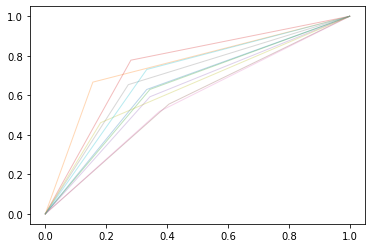

In [83]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model = svm.SVC(C=2, kernel='rbf', gamma='auto',probability=True) #C=1, kernel='linear',probability=True
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

No handles with labels found to put in legend.


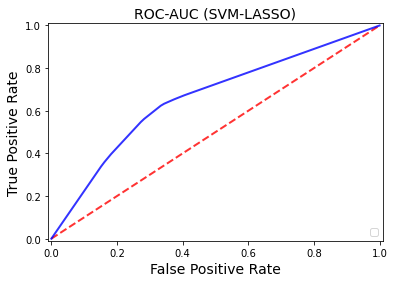

In [84]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
#plt.plot(mean_fpr, mean_tpr, color='b', label=r'SVM-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (SVM-LASSO)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [85]:
#################################### SVM - linear ##########################################################

In [86]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Fold 1 Accuracy: 0.8666666666666667
Fold 2 Accuracy: 0.8983050847457628
Fold 3 Accuracy: 0.864406779661017
Fold 4 Accuracy: 0.7796610169491526
Fold 5 Accuracy: 0.7796610169491526
Fold 6 Accuracy: 0.7288135593220338
Fold 7 Accuracy: 0.7796610169491526
Fold 8 Accuracy: 0.7457627118644068
Fold 9 Accuracy: 0.7288135593220338
Fold 10 Accuracy: 0.7288135593220338

Overall Accuracy: 79.00564971751413 %

Standard Deviation Accuracy is: 0.0638166375393537

Overall precision: 76.43903871323226 %

Standard Deviation Precision is: 0.09831121764556282

Overall Recall: 79.41595441595442 %

Standard Deviation Recall is: 0.07314059218261235

Overall roc_auc: 79.0924469049469 %

Standard Deviation roc_auc is: 0.06056601202928638


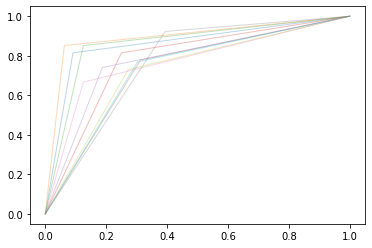

In [135]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model = svm.SVC(C=2, kernel='linear', gamma='auto',probability=True) #C=1, kernel='linear',probability=True
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

No handles with labels found to put in legend.


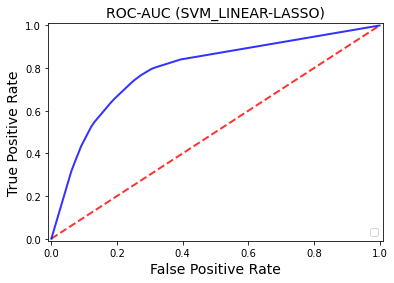

In [88]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
#plt.plot(mean_fpr, mean_tpr, color='b', label=r'SVM-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (SVM_LINEAR-LASSO)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [89]:
####################################### Logistic Regression ############################################

In [90]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Liblinear failed to converge, increase the number of iterations.


Fold 1 Accuracy: 0.8333333333333334
Fold 2 Accuracy: 0.8305084745762712
Fold 3 Accuracy: 0.847457627118644
Fold 4 Accuracy: 0.7627118644067796
Fold 5 Accuracy: 0.7966101694915254
Fold 6 Accuracy: 0.7288135593220338
Fold 7 Accuracy: 0.7627118644067796
Fold 8 Accuracy: 0.8135593220338984
Fold 9 Accuracy: 0.7457627118644068
Fold 10 Accuracy: 0.7627118644067796

Overall Accuracy: 78.84180790960453 %

Standard Deviation Accuracy is: 0.04126937212349959

Overall precision: 76.8028155135788 %

Standard Deviation Precision is: 0.060236047954287796

Overall Recall: 77.16524216524216 %

Standard Deviation Recall is: 0.09230126814939708

Overall roc_auc: 78.710461991712 %

Standard Deviation roc_auc is: 0.042974006538506644


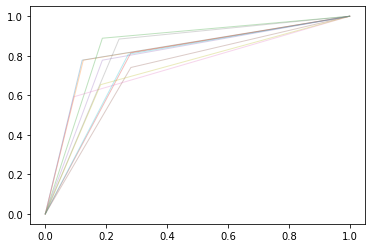

In [136]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model = LogisticRegression(solver='liblinear')
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

No handles with labels found to put in legend.


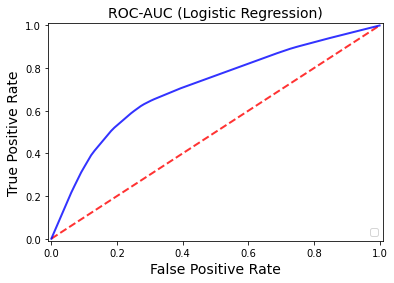

In [137]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)
         #label=r'SVM-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (Logistic Regression)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [138]:
###############################################  Tree Based Techniques ###########################################

In [139]:
################################################# Decision Tree ###################################################

In [140]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [96]:
#DecisionTreeClassifier(max_depth=2, min_samples_split=3,)

Fold 1 Accuracy: 0.5666666666666667
Fold 2 Accuracy: 0.6779661016949152
Fold 3 Accuracy: 0.4915254237288136
Fold 4 Accuracy: 0.6610169491525424
Fold 5 Accuracy: 0.4915254237288136
Fold 6 Accuracy: 0.4745762711864407
Fold 7 Accuracy: 0.4915254237288136
Fold 8 Accuracy: 0.5254237288135594
Fold 9 Accuracy: 0.576271186440678
Fold 10 Accuracy: 0.6610169491525424

Overall Accuracy: 56.175141242937855 %

Standard Deviation Accuracy is: 0.07969553552186392

Overall precision: 50.49835992803325 %

Standard Deviation Precision is: 0.13935681647973353

Overall Recall: 38.23361823361823 %

Standard Deviation Recall is: 0.16382826121495628

Overall roc_auc: 54.6234379046879 %

Standard Deviation roc_auc is: 0.08130721981635355


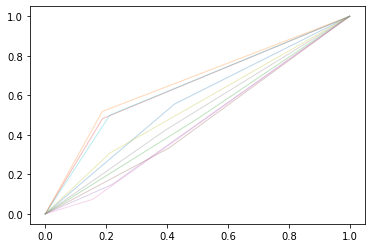

In [141]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

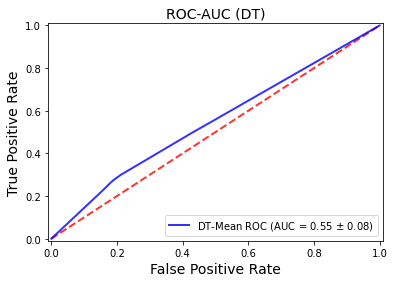

In [142]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'DT-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
#plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (DT)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [143]:
################################# Random Forest  ##############################################################

In [144]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Fold 1 Accuracy: 0.7
Fold 2 Accuracy: 0.7796610169491526
Fold 3 Accuracy: 0.6610169491525424
Fold 4 Accuracy: 0.711864406779661
Fold 5 Accuracy: 0.5932203389830508
Fold 6 Accuracy: 0.559322033898305
Fold 7 Accuracy: 0.5932203389830508
Fold 8 Accuracy: 0.711864406779661
Fold 9 Accuracy: 0.6271186440677966
Fold 10 Accuracy: 0.6610169491525424

Overall Accuracy: 65.98305084745762 %

Standard Deviation Accuracy is: 0.06785331903230268

Overall precision: 63.70219569702329 %

Standard Deviation Precision is: 0.0938007770624571

Overall Recall: 59.173789173789174 %

Standard Deviation Recall is: 0.10330925892917481

Overall roc_auc: 65.37761428386429 %

Standard Deviation roc_auc is: 0.06847122584132802


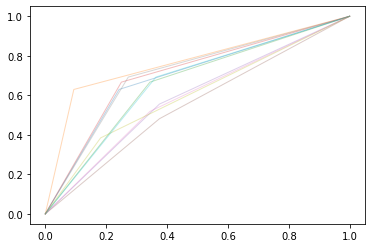

In [145]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model =  RandomForestClassifier(min_samples_leaf=3, min_samples_split=2, n_estimators=150)
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

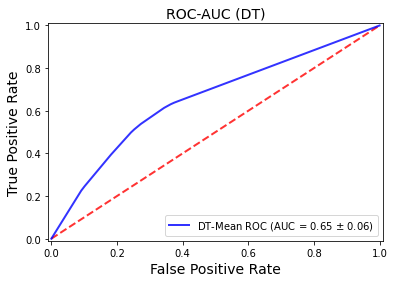

In [146]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'DT-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
#plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (DT)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [147]:
################################# Distance based techniques

In [148]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [149]:
from sklearn.neighbors import KNeighborsClassifier

Fold 1 Accuracy: 0.5833333333333334
Fold 2 Accuracy: 0.559322033898305
Fold 3 Accuracy: 0.576271186440678
Fold 4 Accuracy: 0.711864406779661
Fold 5 Accuracy: 0.576271186440678
Fold 6 Accuracy: 0.5254237288135594
Fold 7 Accuracy: 0.6610169491525424
Fold 8 Accuracy: 0.6271186440677966
Fold 9 Accuracy: 0.559322033898305
Fold 10 Accuracy: 0.576271186440678

Overall Accuracy: 59.56214689265536 %

Standard Deviation Accuracy is: 0.05539592918608299

Overall precision: 55.28719394848427 %

Standard Deviation Precision is: 0.06398646444751392

Overall Recall: 59.572649572649574 %

Standard Deviation Recall is: 0.07725883133915834

Overall roc_auc: 59.582726301476306 %

Standard Deviation roc_auc is: 0.05297207040799998


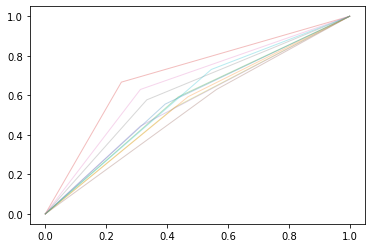

In [150]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model = KNeighborsClassifier(n_neighbors=5)
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

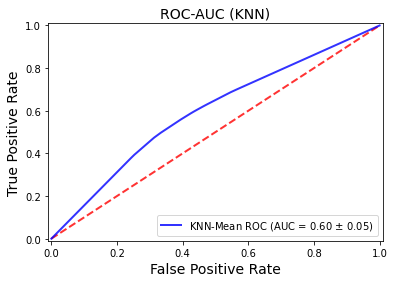

In [151]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'KNN-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
#plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (KNN)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [152]:
###################################################  Naive bayes ##########################

In [153]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [154]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

Fold 1 Accuracy: 0.48333333333333334
Fold 2 Accuracy: 0.5932203389830508
Fold 3 Accuracy: 0.4915254237288136
Fold 4 Accuracy: 0.5932203389830508
Fold 5 Accuracy: 0.4915254237288136
Fold 6 Accuracy: 0.4576271186440678
Fold 7 Accuracy: 0.4915254237288136
Fold 8 Accuracy: 0.5423728813559322
Fold 9 Accuracy: 0.5084745762711864
Fold 10 Accuracy: 0.5423728813559322

Overall Accuracy: 51.951977401129945 %

Standard Deviation Accuracy is: 0.04657286071737717

Overall precision: 48.16489255974659 %

Standard Deviation Precision is: 0.028905299230287427

Overall Recall: 85.76923076923076 %

Standard Deviation Recall is: 0.0816478079356198

Overall roc_auc: 54.92060023310024 %

Standard Deviation roc_auc is: 0.04870535660152963


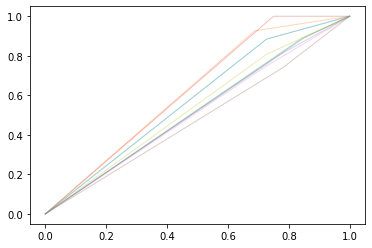

In [155]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified=[]
lst_precision_stratified=[]
lst_recall_stratified=[]
lst_roc_auc_stratified=[]


model = GaussianNB()
i = 0
def train_model(train, test, fold_no):
   # X = ['Retail_Price','Discount']
    #y = ['Returned_Units']
    x_train = train.drop(['Status'],axis=1)
    y_train = train.Status
    x_test = test.drop(['Status'],axis=1)
    y_test = test.Status
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions),)
    lst_accu_stratified.append(accuracy_score(y_test,predictions))
    lst_precision_stratified.append(precision_score(y_test,predictions))
    lst_recall_stratified.append(recall_score(y_test,predictions))
    lst_roc_auc_stratified.append(roc_auc_score(y_test,predictions))
    
    fpr, tpr, thresholds = roc_curve(y_test,predictions)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))
    #i += 1
    
fold_no = 1
for train_index, test_index in skf.split(X_train_lasso, y_train):
    #train = dataset.iloc[train_index,:]
   # test = dataset.iloc[test_index,:]
    train = final_df1.loc[train_index,:]
    test = final_df1.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1
    
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation Accuracy is:', stdev(lst_accu_stratified))
print('\nOverall precision:', mean(lst_precision_stratified)*100, '%')
print('\nStandard Deviation Precision is:', stdev(lst_precision_stratified))
print('\nOverall Recall:', mean(lst_recall_stratified)*100, '%')
print('\nStandard Deviation Recall is:', stdev(lst_recall_stratified))
print('\nOverall roc_auc:', mean(lst_roc_auc_stratified)*100, '%')
print('\nStandard Deviation roc_auc is:', stdev(lst_roc_auc_stratified))

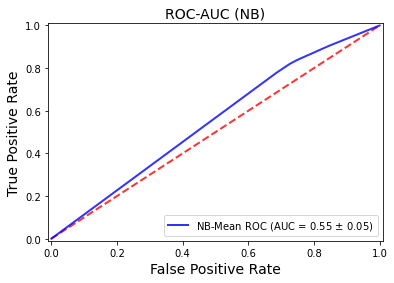

In [156]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',  alpha=.8)#label='Chance',

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'NB-Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
#plt.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC-AUC (NB)',fontsize=14)
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [157]:
########################################## Test set predictions: Use train model to test the data ############################# 

In [158]:
############## test on dataset GSE18838  ################################

In [159]:
#model = svm.SVC(C=2, kernel='linear', gamma='auto',probability=True) #C=1, kernel='linear',probability=True
#model.fit(X_train_test, y_train)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Validation accuracy of Classifier is 0.5472972972972973

Classification report :
               precision    recall  f1-score   support

           0     0.5473    1.0000    0.7074        81
           1     0.0000    0.0000    0.0000        67

    accuracy                         0.5473       148
   macro avg     0.2736    0.5000    0.3537       148
weighted avg     0.2995    0.5473    0.3872       148

[[81  0]
 [67  0]]
Sensitivity_SVC: 0.0
Specificity_SVC: 1.0


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

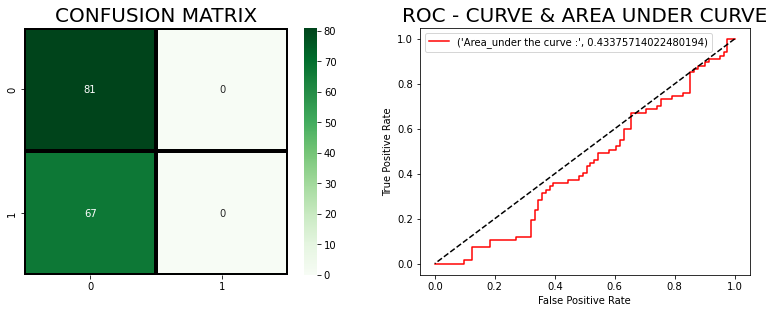

In [186]:
model = svm.SVC(C=1, kernel='rbf',probability=True) #C=1, kernel='linear',probability=True
model.fit(X_train_lasso, y_train)

prediction=model.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Validation accuracy of Classifier is 0.7432432432432432

Classification report :
               precision    recall  f1-score   support

           0     0.7945    0.7160    0.7532        81
           1     0.6933    0.7761    0.7324        67

    accuracy                         0.7432       148
   macro avg     0.7439    0.7461    0.7428       148
weighted avg     0.7487    0.7432    0.7438       148

[[58 23]
 [15 52]]
Sensitivity_SVC: 0.7761194029850746
Specificity_SVC: 0.7160493827160493


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

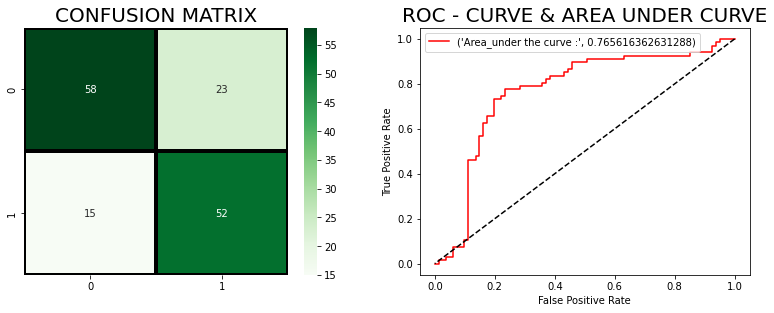

In [187]:
model_lin = svm.SVC(C=2, kernel='linear',probability=True) #C=1, kernel='linear',probability=True
model_lin.fit(X_train_lasso, y_train)

prediction=model_lin.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model_lin.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [173]:
######################################## Logistic regression on complete data ####################################

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Validation accuracy of Classifier is 0.777027027027027

Classification report :
               precision    recall  f1-score   support

           0     0.8158    0.7654    0.7898        81
           1     0.7361    0.7910    0.7626        67

    accuracy                         0.7770       148
   macro avg     0.7760    0.7782    0.7762       148
weighted avg     0.7797    0.7770    0.7775       148

[[62 19]
 [14 53]]
Sensitivity_SVC: 0.7910447761194029
Specificity_SVC: 0.7654320987654321


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

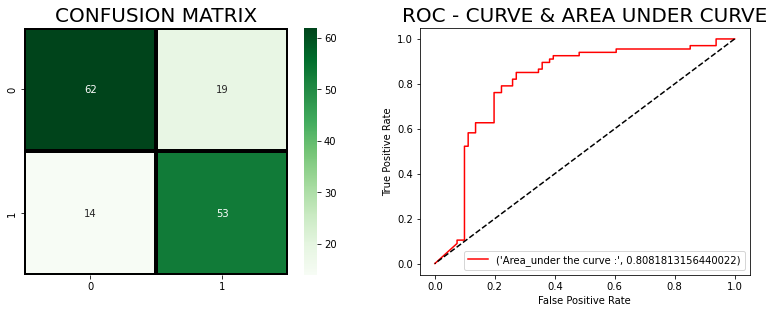

In [188]:
model_LR = LogisticRegression(solver='liblinear') #C=1, kernel='linear',probability=True
model_LR.fit(X_train_lasso, y_train)

prediction=model_LR.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model_LR.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [175]:
######################################## Decision Tree ######################################

Validation accuracy of Classifier is 0.5743243243243243

Classification report :
               precision    recall  f1-score   support

           0     0.6184    0.5802    0.5987        81
           1     0.5278    0.5672    0.5468        67

    accuracy                         0.5743       148
   macro avg     0.5731    0.5737    0.5727       148
weighted avg     0.5774    0.5743    0.5752       148

[[47 34]
 [29 38]]
Sensitivity_SVC: 0.5671641791044776
Specificity_SVC: 0.5802469135802469


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

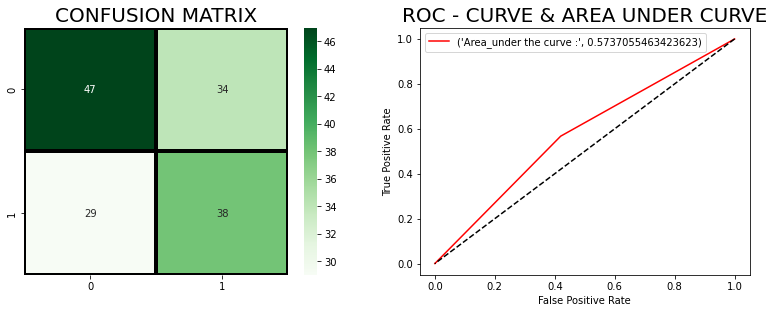

In [189]:

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_lasso, y_train)

prediction=model_DT.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model_DT.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [177]:
#######################################Random Forest #####################################

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Validation accuracy of Classifier is 0.5945945945945946

Classification report :
               precision    recall  f1-score   support

           0     0.6082    0.7284    0.6629        81
           1     0.5686    0.4328    0.4915        67

    accuracy                         0.5946       148
   macro avg     0.5884    0.5806    0.5772       148
weighted avg     0.5903    0.5946    0.5853       148

[[59 22]
 [38 29]]
Sensitivity_SVC: 0.43283582089552236
Specificity_SVC: 0.7283950617283951


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

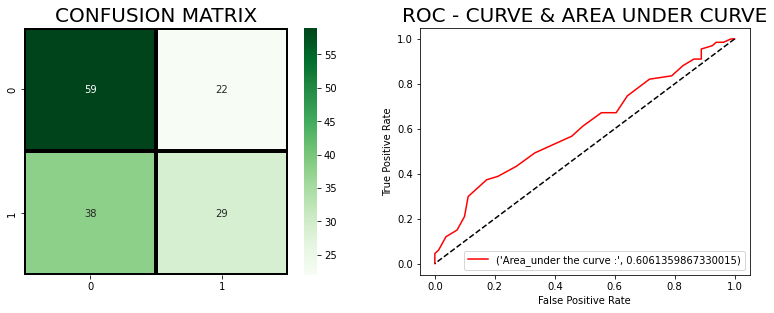

In [190]:

model_RF =  RandomForestClassifier(n_estimators=50)

model_RF.fit(X_train_lasso, y_train)

prediction=model_RF.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model_RF.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [179]:
################################# Distance Based ##############################################

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Validation accuracy of Classifier is 0.6351351351351351

Classification report :
               precision    recall  f1-score   support

           0     0.6709    0.6543    0.6625        81
           1     0.5942    0.6119    0.6029        67

    accuracy                         0.6351       148
   macro avg     0.6325    0.6331    0.6327       148
weighted avg     0.6362    0.6351    0.6355       148

[[53 28]
 [26 41]]
Sensitivity_SVC: 0.6119402985074627
Specificity_SVC: 0.654320987654321


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

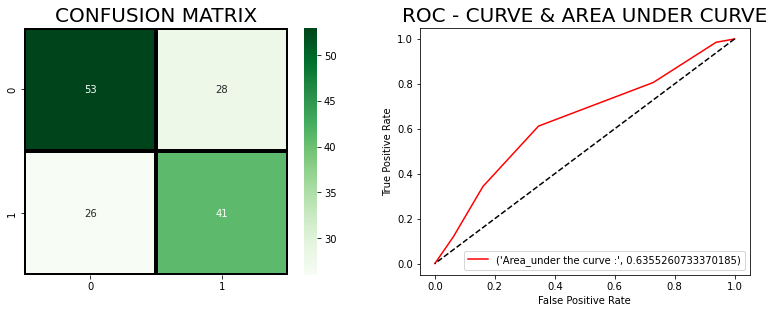

In [191]:

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train_lasso, y_train)

prediction=model_knn.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model_knn.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [181]:
############################################# Naive Bayes ################################################

Validation accuracy of Classifier is 0.4797297297297297

Classification report :
               precision    recall  f1-score   support

           0     0.5769    0.1852    0.2804        81
           1     0.4590    0.8358    0.5926        67

    accuracy                         0.4797       148
   macro avg     0.5180    0.5105    0.4365       148
weighted avg     0.5235    0.4797    0.4217       148

[[15 66]
 [11 56]]
Sensitivity_SVC: 0.835820895522388
Specificity_SVC: 0.18518518518518517


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

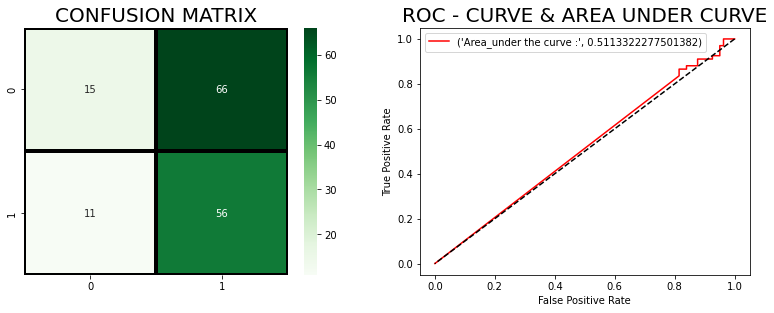

In [193]:
model_NB = GaussianNB()

model_NB.fit(X_train_lasso, y_train)

prediction=model_NB.predict(X_test_lasso)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction,digits=4)))


#Confusion matrix
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)
print("Sensitivity_SVC:",sensitivity)
specificity = TN / (TN + FP)
print("Specificity_SVC:",specificity)


#ROC curve and Area under the curve plotting
predicting_probabilites = model_NB.predict_proba(X_test_lasso)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [183]:
######################################## XAI ##########################################################

In [184]:
import shap

In [134]:
shap.initjs()

In [160]:
# use Kernel SHAP to explain test set predictions
shap_explainer = shap.KernelExplainer(model_lin.predict_proba, X_train_lasso, link="identity")

Using 591 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [161]:
shap_values = shap_explainer.shap_values(X_test_lasso)


  0%|          | 0/148 [00:00<?, ?it/s]

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

In [162]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train_lasso.columns,sum(vals))),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head()


,col_name,feature_importance_vals
343,GFRA1,8.117462
354,CALB2,6.226311
425,PLA2G2F,5.963722
254,GPR85,5.953054
299,UGT2A3,5.943164


In [163]:
feature_importance.to_csv('Feature Importance.csv') 

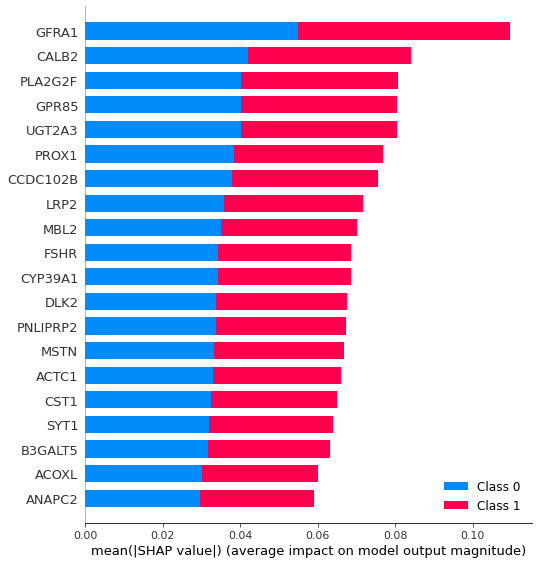

In [164]:
shap.summary_plot(shap_values, X_test_lasso)

In [165]:
feature_importance.head(20)

,col_name,feature_importance_vals
343,GFRA1,8.117462
354,CALB2,6.226311
425,PLA2G2F,5.963722
254,GPR85,5.953054
299,UGT2A3,5.943164
69,PROX1,5.687654
376,CCDC102B,5.591265
124,LRP2,5.306452
67,MBL2,5.187394
414,FSHR,5.073148


In [166]:
np.abs(shap_values)[1].mean(0)

array([0.0047034 , 0.02649309, 0.00495335, 0.01204655, 0.00537582,
       0.01062544, 0.01744373, 0.00823258, 0.02180523, 0.01840981,
       0.00502996, 0.0124906 , 0.00688698, 0.01619963, 0.00973191,
       0.011889  , 0.00374616, 0.01884757, 0.00501688, 0.01171431,
       0.01533665, 0.00962962, 0.00966922, 0.00585412, 0.02281022,
       0.00876374, 0.00397735, 0.01210288, 0.02309319, 0.00660826,
       0.00453694, 0.02946546, 0.00385687, 0.00767257, 0.02596546,
       0.01230288, 0.00943593, 0.00604821, 0.010752  , 0.01060781,
       0.00366679, 0.00790385, 0.02824578, 0.0081163 , 0.02933736,
       0.0096716 , 0.00433507, 0.00540303, 0.00422463, 0.02253968,
       0.01962499, 0.0070102 , 0.02300347, 0.02323267, 0.00801568,
       0.02542894, 0.01139731, 0.00971507, 0.02012959, 0.01021593,
       0.01596132, 0.01464823, 0.00384166, 0.0048211 , 0.01658765,
       0.02726191, 0.01017019, 0.03504996, 0.00457643, 0.03843012,
       0.02464416, 0.0033058 , 0.0126779 , 0.01448463, 0.00801

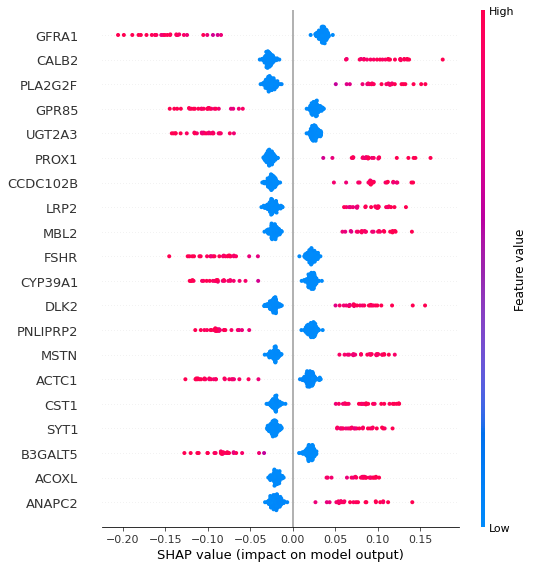

In [167]:
shap.summary_plot(shap_values[0], X_test_lasso)